In [18]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Costanti fisiche
#######################################################################
sigma = 5.67e-8  #Costante di Stefan-Boltzmann (W/m²/K⁴)
S0 = 1361        # Costante solare (W/m²)
albedo = 0.3     # Albedo terrestre
epsilon = 0.92   # Emissività degli strati atmosferici
N = 10            # Numero di strati atmosferici
H_max = 15_000   # Altezza massima dell'atmosfera (15 km)

# Vettore quota (N strati equidistanti tra 0 e 15 km (in metri))
altitude = np.linspace(0, H_max, N)

# Flusso di energia solare incidente sulla superficie terrestre (diviso 4 per la geometria terrestre)
F_in = (1 - albedo) * S0 / 4


In [3]:
# Inizializzazione delle temperature (stima iniziale)
T_surf = (F_in / sigma) ** 0.25      # Temperatura della superficie terrestre senza atmosfera
T_layers = np.full(N, T_surf - 10)   # Strati più freddi della superficie inizialmente


In [4]:
# Iterazione per trovare l'equilibrio termico
######################################################################

for _ in range(1000):  
    
    # Radiazione emessa dalla superficie
    F_surface = sigma * T_surf**4

    # Radiazione emessa dagli strati atmosferici
    F_atmos = sigma * T_layers**4

    # Aggiornamento della temperatura degli strati atmosferici
    for i in range(N):
        if i == 0:
            # Lo strato più basso riceve energia dalla superficie e dallo strato superiore
            F_absorbed = epsilon * (F_surface + F_atmos[i + 1] if N > 1 else 0) / 2
        elif i == N - 1:
            # Lo strato più alto riceve energia solo dallo strato inferiore
            F_absorbed = epsilon * F_atmos[i - 1] / 2
        else:
            # Strati intermedi ricevono energia dagli strati sopra e sotto
            F_absorbed = epsilon * (F_atmos[i - 1] + F_atmos[i + 1]) / 2

        T_layers[i] = (F_absorbed / sigma) ** 0.25

    # Aggiornamento della temperatura della superficie
    T_surf = ((F_in + epsilon * F_atmos[0]) / sigma) ** 0.25

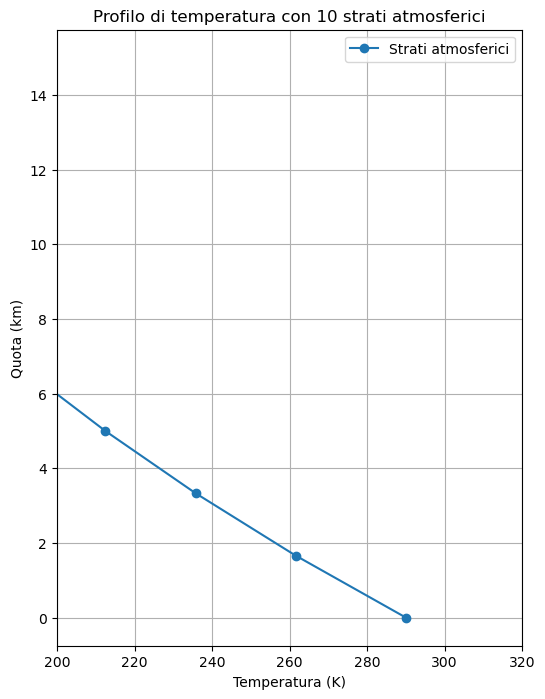

In [6]:
# Plot del profilo di temperatura
plt.figure(figsize=(6, 8))
plt.plot(T_layers, altitude / 1000, marker='o', label='Strati atmosferici')  # Conversione in km
#plt.axhline(y=0, color='r', linestyle='--', label=f'Superficie ({T_surf:.1f} K)')
plt.scatter(T_surf, 0, color='red')

plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
#plt.xlim(200,320)
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()
plt.show()

In [9]:
######################################################################
# Gradiente adiabatico secco (K/m)
g = 9.81              # m/s², accelerazione di gravità
cp = 1004             # J/(kg·K), calore specifico dell'aria secca
Gamma_d = g / cp      # K/m
Gamma_d_secca = 9.8   # Gradiente adiabatica secca (°C/km)
Gamma_d_umida = 6.5   # Gradiente adiabatica umida (°C/km)


# Limite massimo del gradiente di temperatura
max_gradient = 10     # Limite massimo del gradiente in °C/km
F_in = (1 - albedo) * S0 / 4

In [10]:
# Inizializzazione temperature
T_surf_conv = (F_in / sigma) ** 0.25      # Temperatura della superficie terrestre senza atmosfera
T_layers_conv = np.full(N, T_surf_conv - 10)  # Strati inizialmente più freddi

for _ in range(100):  
    # Radiazione emessa dalla superficie e dagli strati atmosferici
    F_surface = sigma * T_surf_conv**4
    F_atmos = sigma * T_layers_conv**4

    for i in range(N):
        if i == 0:
            F_absorbed = epsilon * (F_surface + (F_atmos[i + 1] if N > 1 else 0)) / 2
        elif i == N - 1:
            F_absorbed = epsilon * F_atmos[i - 1] / 2
        else:
            F_absorbed = epsilon * (F_atmos[i - 1] + F_atmos[i + 1]) / 2

        # Temperatura radiativa
        T_new = (F_absorbed / sigma) ** 0.25

        # **CORREZIONE GRADIENTE MASSIMO**
        if i > 0:
            gradient = (T_new - T_layers_conv[i-1]) / (altitude[i] - altitude[i-1])
            print(gradient*1000)
            if abs(gradient) > max_gradient / 1000:  # Convertito in K/m:  # Convertito in K/m
                print('CORRECTION')
                T_new = T_layers_conv[i-1] + np.sign(gradient) * max_gradient / 1000 * (altitude[i] - altitude[i-1])


        T_layers_conv[i] = T_new  # Assegna la temperatura corretta allo strato

    # Aggiornamento della temperatura della superficie
    F_atmos[0] = sigma * T_layers_conv[0]**4  # Radiazione emessa dal primo strato
    T_surf_conv = (( (1 - albedo) * S0 / 4 + epsilon * F_atmos[0]) / sigma) ** 0.25


-3.0263281967579982
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-22.866688343656598
CORRECTION
-16.97528289864653
CORRECTION
-8.480385726624645
0.0
0.0
0.0
0.0
0.0
-4.632817096526454
-17.76213972914813
CORRECTION
-17.793491685848156
CORRECTION
-13.338194965793791
CORRECTION
-7.672749156086514
0.0
0.0
0.0
-2.2117167124500536
-4.368097502608118
-19.16849475112214
CORRECTION
-16.849789620818598
CORRECTION
-15.664297469652254
CORRECTION
-11.184911189692311
CORRECTION
-5.094505854941138
0.0
-1.0699090292572184
-2.0341131480315813
-5.5114929449549175
-18.283772447735355
CORRECTION
-15.829620509315454
CORRECTION
-15.56375055073014
CORRECTION
-13.34149224371147
CORRECTION
-8.752690451413592
-3.084741754489698
-0.9726941393063445
-3.088957782731243
-5.347231996356136
-18.20297605596433
CORRECTION
-15.115745591032212
CORRECTION
-14.85237057008693
CORRECTION
-14.09564390456917
CORRECTION
-11.018628632628086
CORRECTION
-6.107995670442089
-3.0219898073159595
-2.935347356941228
-5.900595246698625
-17.49271317809293

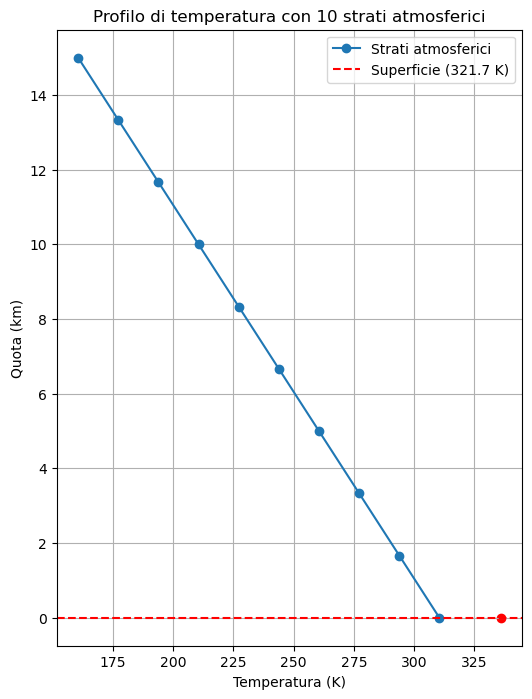

In [11]:
# Plot del profilo di temperatura
plt.figure(figsize=(6, 8))
plt.plot(T_layers_conv, altitude / 1000, marker='o', label='Strati atmosferici')  # Conversione in km
plt.axhline(y=0, color='r', linestyle='--', label=f'Superficie ({T_surf:.1f} K)')
plt.scatter(T_surf_conv, 0, color='red')


plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()
plt.show()

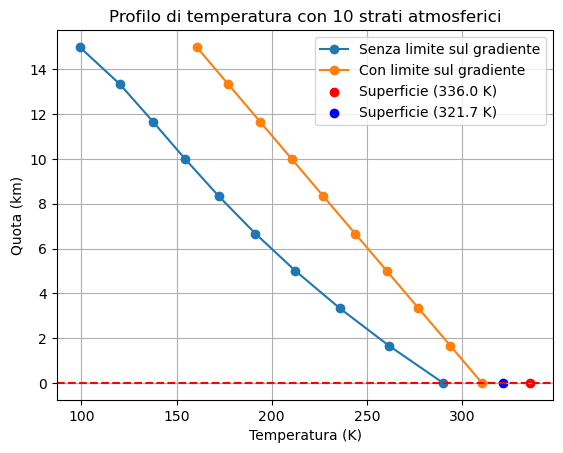

In [12]:
import matplotlib.pyplot as plt

# Supponiamo che T_layers_no_constraint e T_layers_with_constraint siano già calcolati

# Plot del profilo di temperatura senza constraint
plt.plot(T_layers, altitude / 1000, marker='o', label='Senza limite sul gradiente')

# Plot del profilo di temperatura con constraint
plt.plot(T_layers_conv, altitude / 1000, marker='o', label='Con limite sul gradiente')

# Aggiungi una linea orizzontale per la temperatura della superficie
plt.axhline(y=0, color='r', linestyle='--')
plt.scatter(T_surf_conv, 0, color='red', label=f'Superficie ({T_surf_conv:.1f} K)')
plt.scatter(T_surf, 0, color='blue', label=f'Superficie ({T_surf:.1f} K)')

# Etichette e titolo
plt.xlabel('Temperatura (K)')
plt.ylabel('Quota (km)')
plt.legend()
plt.title(f'Profilo di temperatura con {N} strati atmosferici')
plt.grid()

# Mostra il plot

In [2]:
import numpy as np
from scipy.optimize import root

# Constants
sigma = 5.67e-8  # Stefan-Boltzmann constant in W/m^2/K^4
S = 1361  # Solar constant (W/m^2)
A1 = A2 = A3 = A4 = A5 = A6 = 1  # Assume perfect emissivity for simplicity
# IR absorptivity for each layer (can be set to realistic values based on physical properties)
E = np.array([0.9, 0.8, 0.7, 0.6, 0.5, 0.4])
# SW transmissivity for each layer
X = np.array([0.8, 0.75, 0.7, 0.65, 0.6, 0.55])

# Reasonable initial guesses for temperatures (in K), based on physical intuition
T_initial_guess = np.array([300, 295, 290, 285, 280, 275])

# Radiative emissions function
def radiative_emission(T):
    return sigma * T**4

# Energy balance equations for each layer
def energy_balance(T):
    # Layer 1 energy balance
    eq1 = S * (1 - X[0]) + E[1] * radiative_emission(T[1]) * A1 + \
          E[2] * radiative_emission(T[2]) * A1 * T[1] + \
          E[3] * radiative_emission(T[3]) * A1 * T[1] * T[2] + \
          E[4] * radiative_emission(T[4]) * A1 * T[1] * T[2] * T[3] + \
          E[5] * radiative_emission(T[5]) * A1 * T[1] * T[2] * T[3] * T[4] - 2 * E[0] * radiative_emission(T[0])

    # Layer 2 energy balance
    eq2 = S * (1 - X[1]) + E[2] * radiative_emission(T[2]) * A1 + \
          E[3] * radiative_emission(T[3]) * A1 * T[2] + \
          E[4] * radiative_emission(T[4]) * A1 * T[2] * T[3] + \
          E[5] * radiative_emission(T[5]) * A1 * T[2] * T[3] * T[4] - 2 * E[1] * radiative_emission(T[1])

    # Layer 3 energy balance
    eq3 = S * (1 - X[2]) + E[3] * radiative_emission(T[3]) * A1 + \
          E[4] * radiative_emission(T[4]) * A1 * T[3] + \
          E[5] * radiative_emission(T[5]) * A1 * T[3] * T[4] - 2 * E[2] * radiative_emission(T[2])

    # Layer 4 energy balance
    eq4 = S * (1 - X[3]) + E[4] * radiative_emission(T[4]) * A1 + \
          E[5] * radiative_emission(T[5]) * A1 * T[4] - 2 * E[3] * radiative_emission(T[3])

    # Layer 5 energy balance
    eq5 = S * (1 - X[4]) + E[5] * radiative_emission(T[5]) * A1 * T[4] - 2 * E[4] * radiative_emission(T[4])

    # Layer 6 energy balance
    eq6 = S * (1 - X[5]) - 2 * E[5] * radiative_emission(T[5])

    return [eq1, eq2, eq3, eq4, eq5, eq6]

# Solve the system of equations using the root solver for better robustness
T_solution = root(energy_balance, T_initial_guess)

# Check if the solver converged and output the results
if T_solution.success:
    for i, T in enumerate(T_solution.x, start=1):
        print(f"Temperature of layer S{i}: {T:.2f} K")
else:
    print("Solver did not converge:", T_solution.message)


Solver did not converge: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
